In [8]:
%matplotlib inline
import numpy as np
import pandas as pd
from read_help import read_adp_csv
import matplotlib.pyplot as plt

plt.style.use('ggplot')

In [150]:
year = 2000
dfs = {}
for i in range(7, 20, 1):
    dfs[f'{year+i}'] = read_adp_csv(year+i)


In [153]:

grouped_pos = [df.groupby('pos') for df in dfs.values()]

grouped_pos_count = [group['player'].count() for group in grouped_pos]


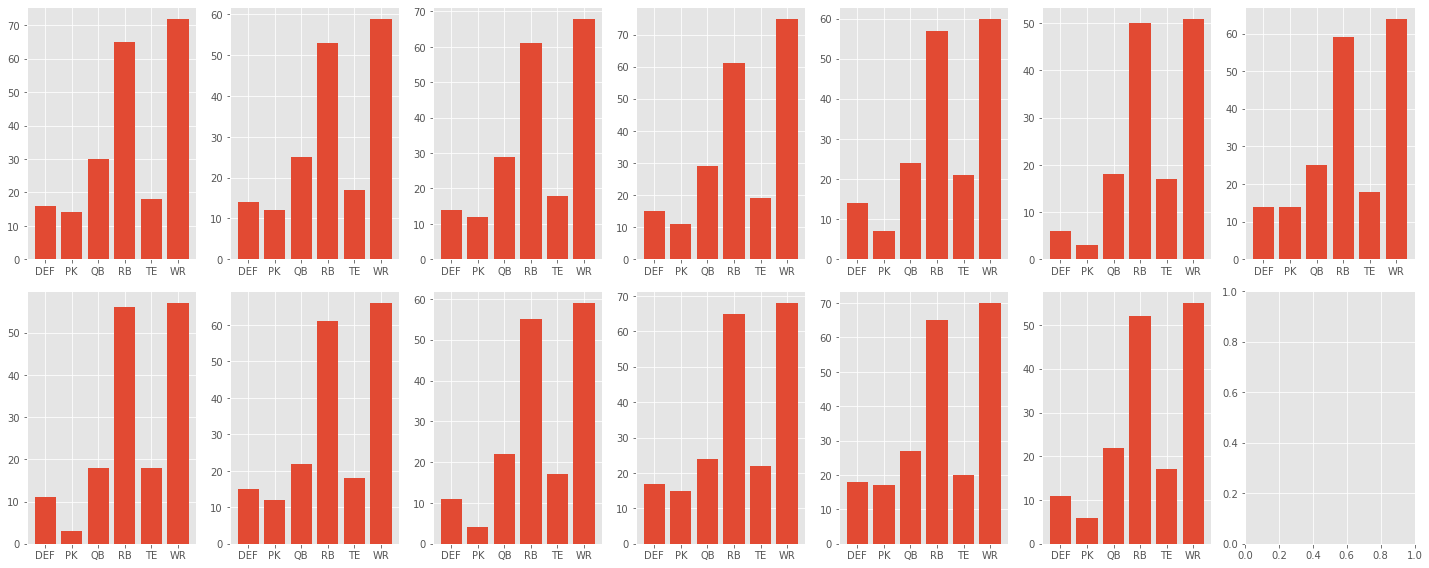

In [155]:
fig, axs = plt.subplots(2, 7, figsize=(20, 8))

for ax, data in zip(axs.flatten(), grouped_pos_count):
    ax.bar(data.index,data)

plt.tight_layout()


In [156]:
avg_pos = []
for p in grouped_pos:
    avg_pos.append(pd.Series(p['pick'].mean().sort_values()))
    
year_i = 2000
indexes = []
for i in range(7, 20, 1):
    indexes.append(year+i)

In [157]:
avg_pos = pd.DataFrame(avg_pos).reset_index().drop('index', axis=1)


In [164]:
years = pd.Series(list(dfs.keys()))
years.name='years'

In [170]:
#avg_pos = avg_pos.join(years, 'index')
avg_pos = avg_pos.set_index(years)

In [171]:
avg_pos

,RB,WR,QB,TE,DEF,PK
years,,,,,,
2007,7.098923,8.494306,9.333000,9.403889,11.310000,13.422857
2008,6.276792,7.284746,7.541200,8.757059,11.194286,13.701667
2009,6.916885,8.006912,8.650000,9.225556,11.464286,13.807500
2010,7.222131,8.330000,8.822759,8.847368,11.979333,13.619091
2011,6.725439,7.278000,7.803750,9.110952,10.780000,13.922857
2012,5.796400,6.496667,5.457222,7.827647,11.548333,11.743333
2013,6.370678,7.718594,8.660400,8.737222,11.484286,13.780714
2014,6.266071,6.712105,6.774444,8.183889,11.424545,12.730000
2015,6.705574,7.425000,8.330000,8.678333,12.010667,13.972500


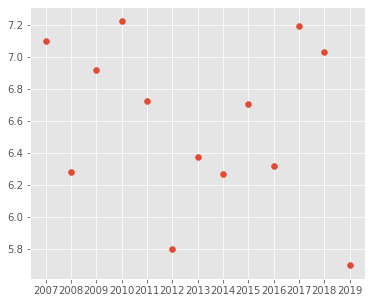

In [180]:
fig, ax = plt.subplots(1, figsize=(6, 5))
ax.scatter(avg_pos.index, avg_pos['RB'])